### **For this assignment the only permitted libraries to use are Numpy, Scipy, MatplotLib and Pandas! All four have been imported for you in this Notebook.**

In [66]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading

Train and Test sets can be found in the `Resources` folder. You can choose to visualize your data all at once, in windows, or only considering a subset of sensors to detect which ones would prove most useful to your analysis.
An example of such a visualization can be found in the following cell.

In [67]:
train_file_path = 'lab1_train.csv'
test_file_path = 'lab1_test.csv'

train_data = pd.read_csv(train_file_path, delimiter=',')
test_data  = pd.read_csv(test_file_path, delimiter=',')


# Convert Timestamp column to datetime
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

### Data Cleaning


In [68]:
train_data = train_data.dropna()
test_data = test_data.dropna()

print("Shape of Train Data:", train_data.shape)
print("Shape of Test Data:", test_data.shape)

print("Train Data:")
train_data

Shape of Train Data: (496800, 53)
Shape of Test Data: (449919, 53)
Train Data:


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
1,2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2,2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
3,2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
4,2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,2015-12-28 09:59:55,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1,Normal
496796,2015-12-28 09:59:56,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496797,2015-12-28 09:59:57,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496798,2015-12-28 09:59:58,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.81710,1.649953,189.502700,0.000128,1,1,1,Normal


### 1. Familiarization

#### a. What types of signals are there?

Based on the groups of prefixes we detected below and the data types the signals have, we distinguish between different types of sensors:

- LITxxx (continuous)
- FITxxx (continuous)
- PITxxx (continuous)
- AITxxx (continuous)
- DPIxxx (continuous)
- MVxxx (discrete)
- UVxxx (discrete)
- Pxxx (discrete)

After further research, we found their real-life meaning as well:

- LIT -> Level Indicator Transmitter: measures tank levels
- FIT -> Flow Indicator Transmitter: measures flow rate in pipes
- PIT -> Pressure Indicator Transmitter: measures pressure
- AIT -> Analyzer Indicator Transmitter: chemical analyzers
- DPI -> Differential Pressure Transmitter: pressure differences
- MV -> Motorized Valve: open/closed state
- UV-> Ultrasonic Valve: open/closed state
- P -> Pumps: on/off state

In [69]:
train_data.info()
train_data.head
train_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496800 entries, 0 to 496799
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      496800 non-null  datetime64[ns]
 1   FIT101         496800 non-null  float64       
 2   LIT101         496800 non-null  float64       
 3   MV101          496800 non-null  int64         
 4   P101           496800 non-null  int64         
 5   P102           496800 non-null  int64         
 6   AIT201         496800 non-null  float64       
 7   AIT202         496800 non-null  float64       
 8   AIT203         496800 non-null  float64       
 9   FIT201         496800 non-null  float64       
 10  MV201          496800 non-null  int64         
 11  P201           496800 non-null  int64         
 12  P202           496800 non-null  int64         
 13  P203           496800 non-null  int64         
 14  P204           496800 non-null  int64         
 15  

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

#### Group by prefix of 3 letters and count how many of each type there is

In [70]:
sensor_cols = [c for c in train_data.columns if c not in ["Timestamp", "Normal/Attack"]]

prefixes = [c[:3] for c in sensor_cols]
pd.Series(prefixes).value_counts()

FIT    9
AIT    9
P20    6
P40    4
MV3    4
LIT    3
PIT    3
P60    3
P50    2
P10    2
P30    2
MV2    1
MV1    1
DPI    1
UV4    1
Name: count, dtype: int64

#### b. Are the signals correlated? Do they show cyclic behavior?
- In general the sensors are not very strongly correlated, except for when they belong to the same group. There are some clear correlation clusters in the heatmap below.
There are visible red blocks along the diagonal, for example among the sensors FIT50x, AIT50x, P50x, PIT50x and FIT60x. Similar clusters appear around FIT30x/LIT30x/P30x and around some of the P40x/AIT40x signals. This indicates that sensors belonging to the same part of the process tend to move together.

- Yes, some of them show cyclic behaviour over several days. This can be derived from the plots underneath, specifically from the one with all the sensors. We can see repeating osciallations over time intervals, indicating cyclic behaviour (exmaples: FIT101, LIT101, visualized below). We have also plotted the sliding window correlation heatmap for sensor FIT101, which furhter proves its cyclic behaviour. Windows that are one cycle apart have very similar correlation matrices, creating those parallel, repeating patterns. On the other hand, clear non-cyclic examples are UV401, P402, P201, visualized below.

#### Correlation between sensors(heatmap)

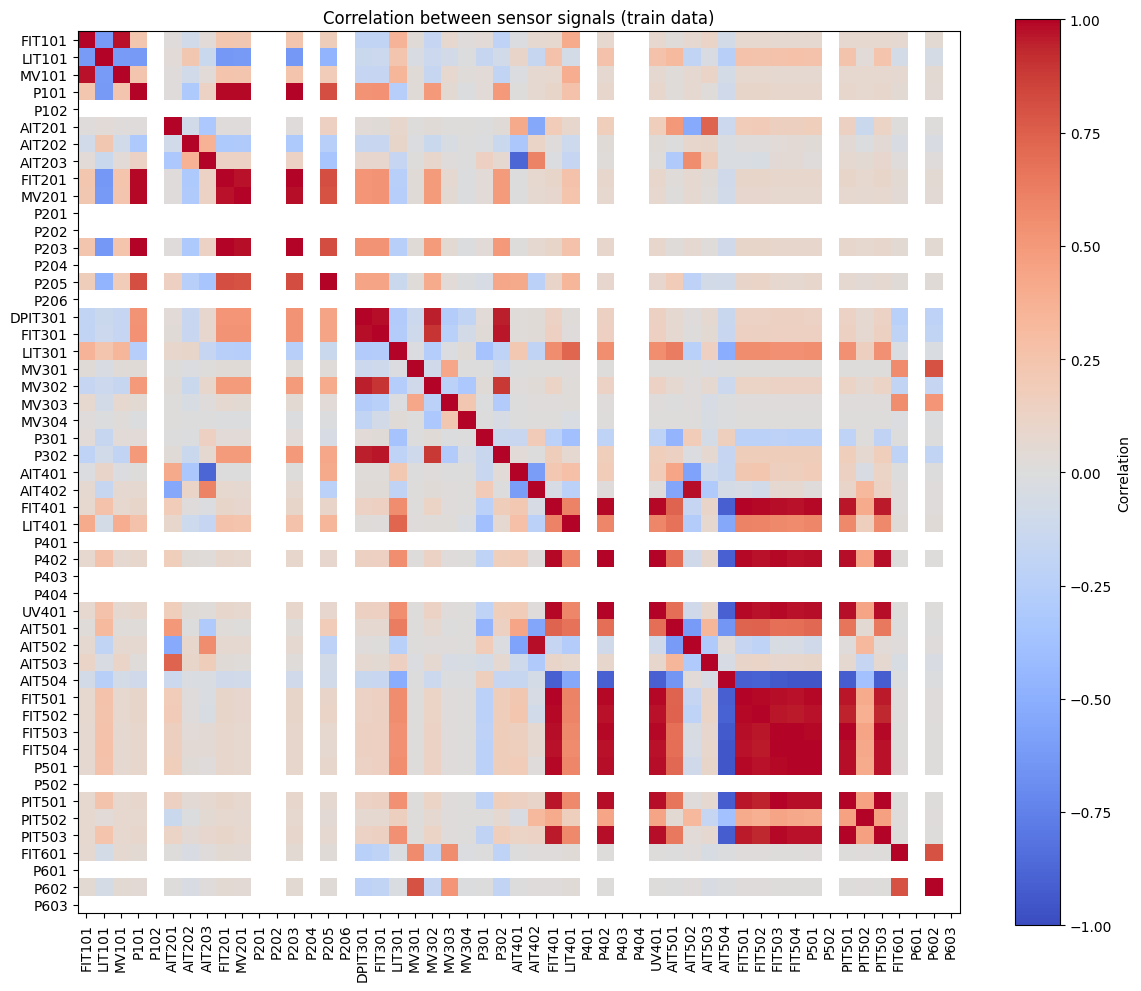

In [71]:
train_sensors = train_data[sensor_cols]
corr = train_sensors.corr()

plt.figure(figsize=(12, 10))

plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(sensor_cols)), sensor_cols, rotation=90)
plt.yticks(range(len(sensor_cols)), sensor_cols)

plt.title("Correlation between sensor signals (train data)")
plt.tight_layout()
plt.show()


#### Sliding window correlation

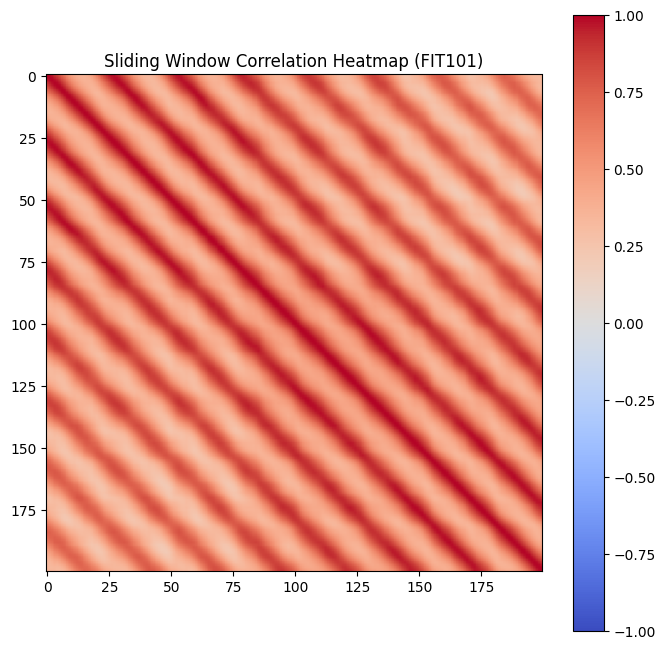

In [72]:
def signal_heatmap(signal, window_size=200, start_index=0, end_index=None, num_windows=100):
    sig = train_data[signal].values


    if end_index is None:
        end_index = len(sig)

    sliced = sig[start_index:end_index]
    total = len(sliced) - window_size

    if total <= 0:
        print(f"Not enough data for window_size={window_size}.")
        return

    num_windows = min(num_windows, total)
    indices = np.linspace(0, total, num_windows, dtype=int)
    windows = np.array([sliced[i : i + window_size] for i in indices])

    windows_df = pd.DataFrame(windows)
    corr_df = windows_df.corr(method="spearman")

    plt.figure(figsize=(8, 8))
    im = plt.imshow(corr_df, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(im)
    plt.title(f"Sliding Window Correlation Heatmap ({signal})")
    plt.show()

signal_heatmap("FIT101", window_size=200, start_index=0, num_windows=100)

#### Visualize sensor data

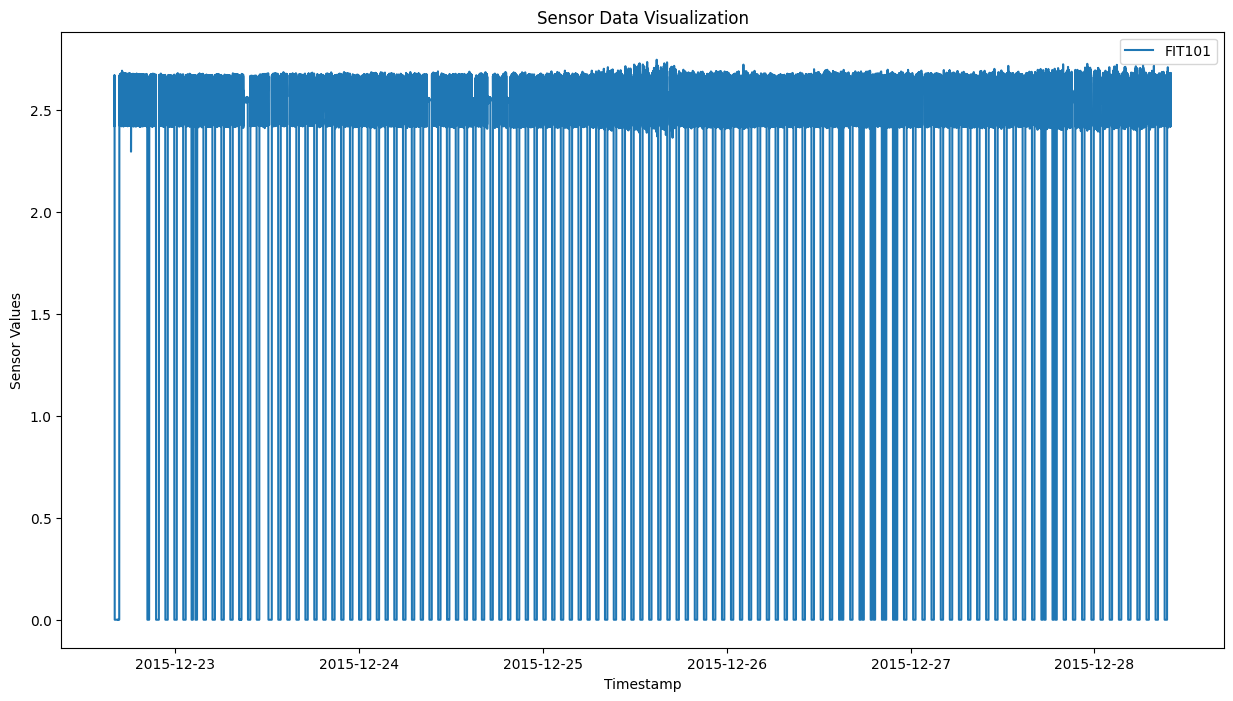

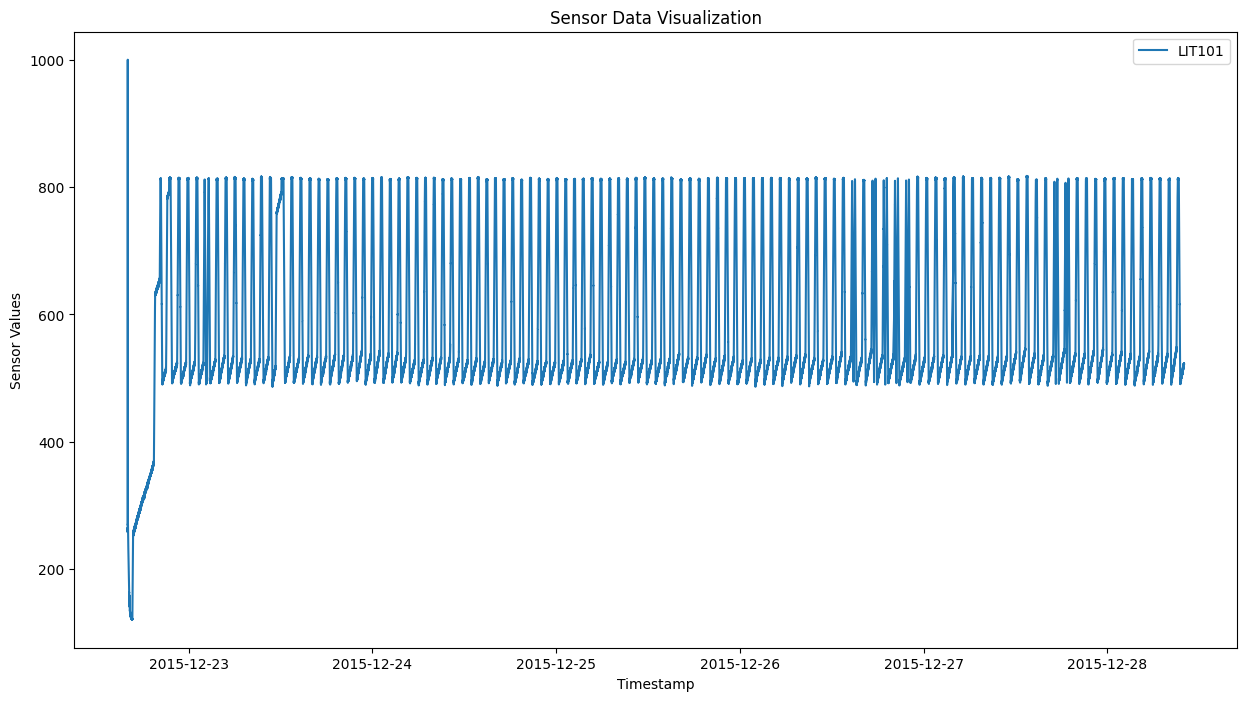

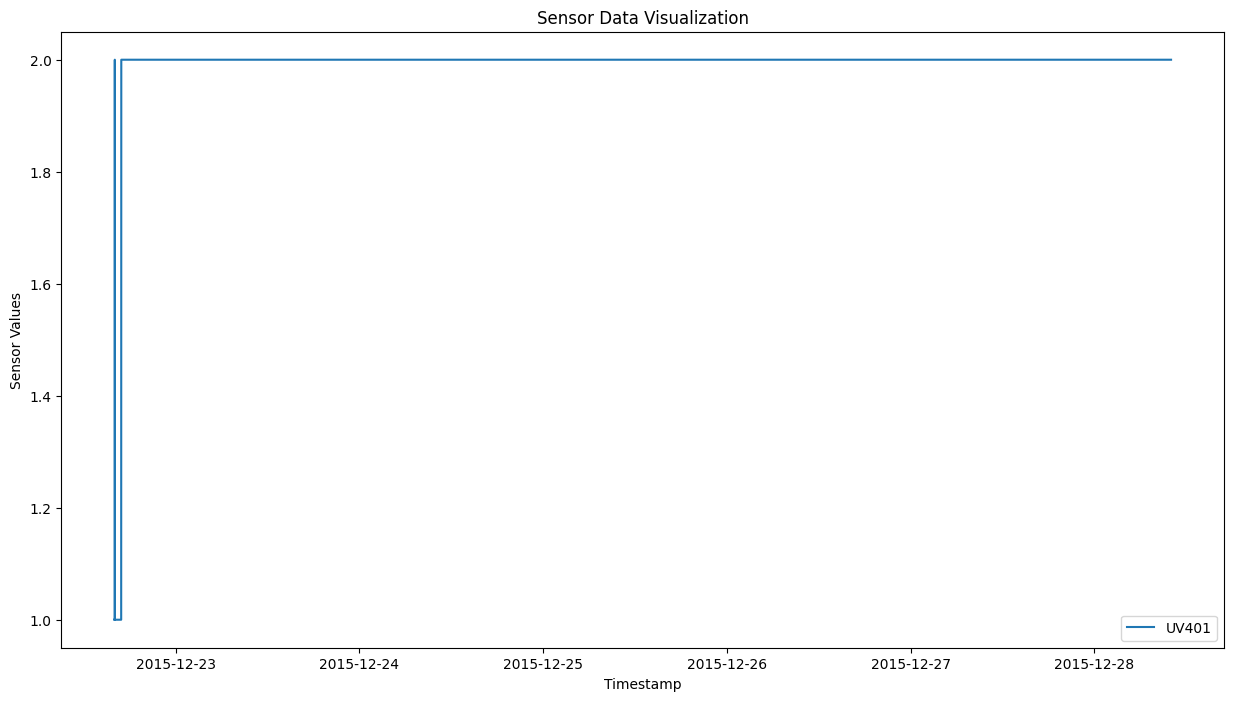

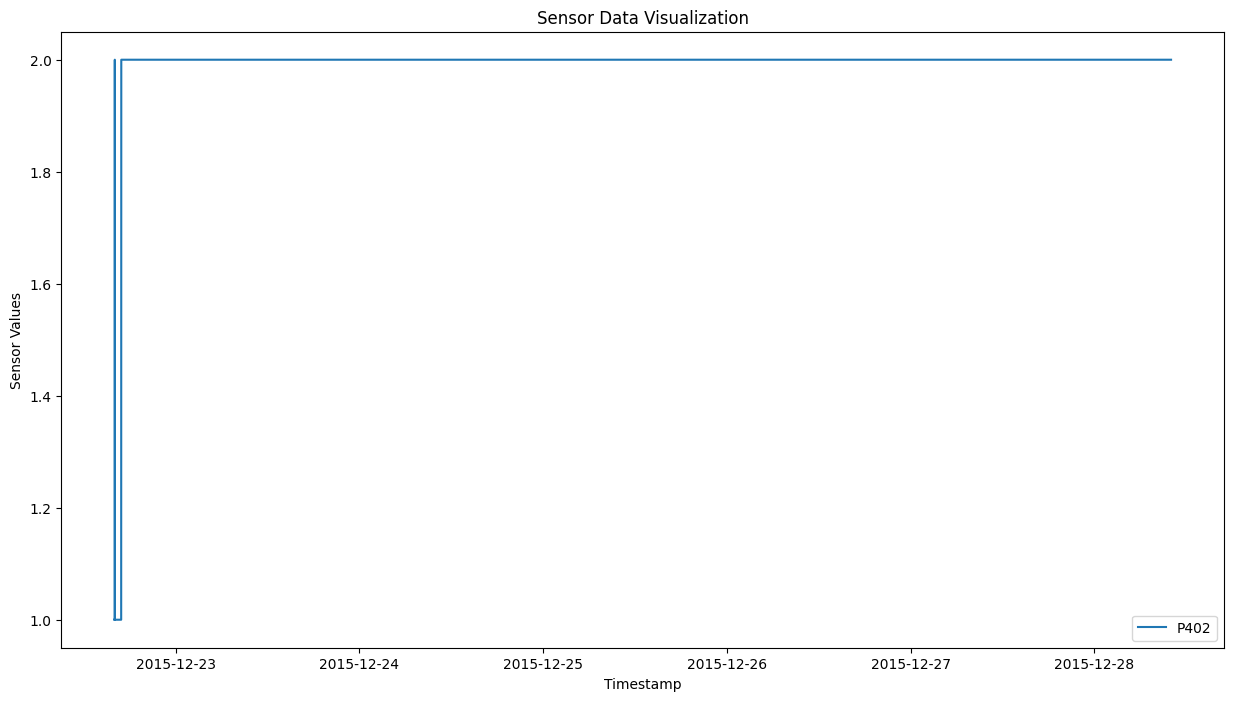

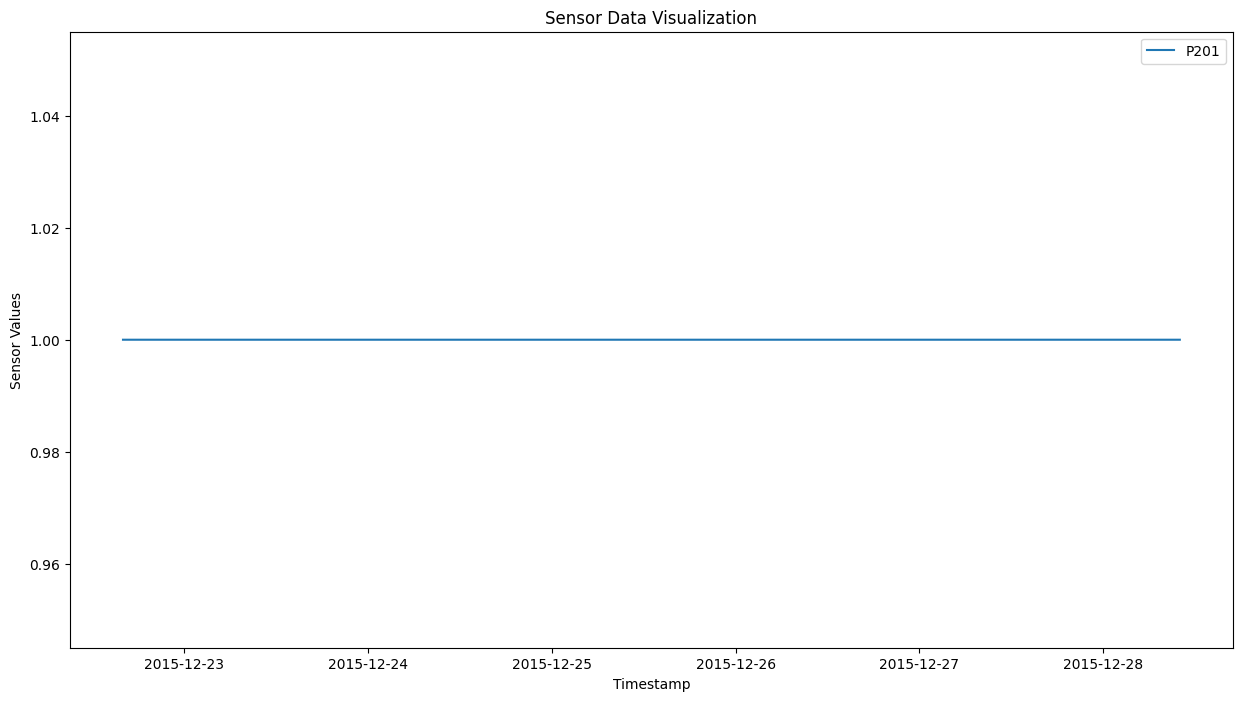

C:\Users\Andreea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


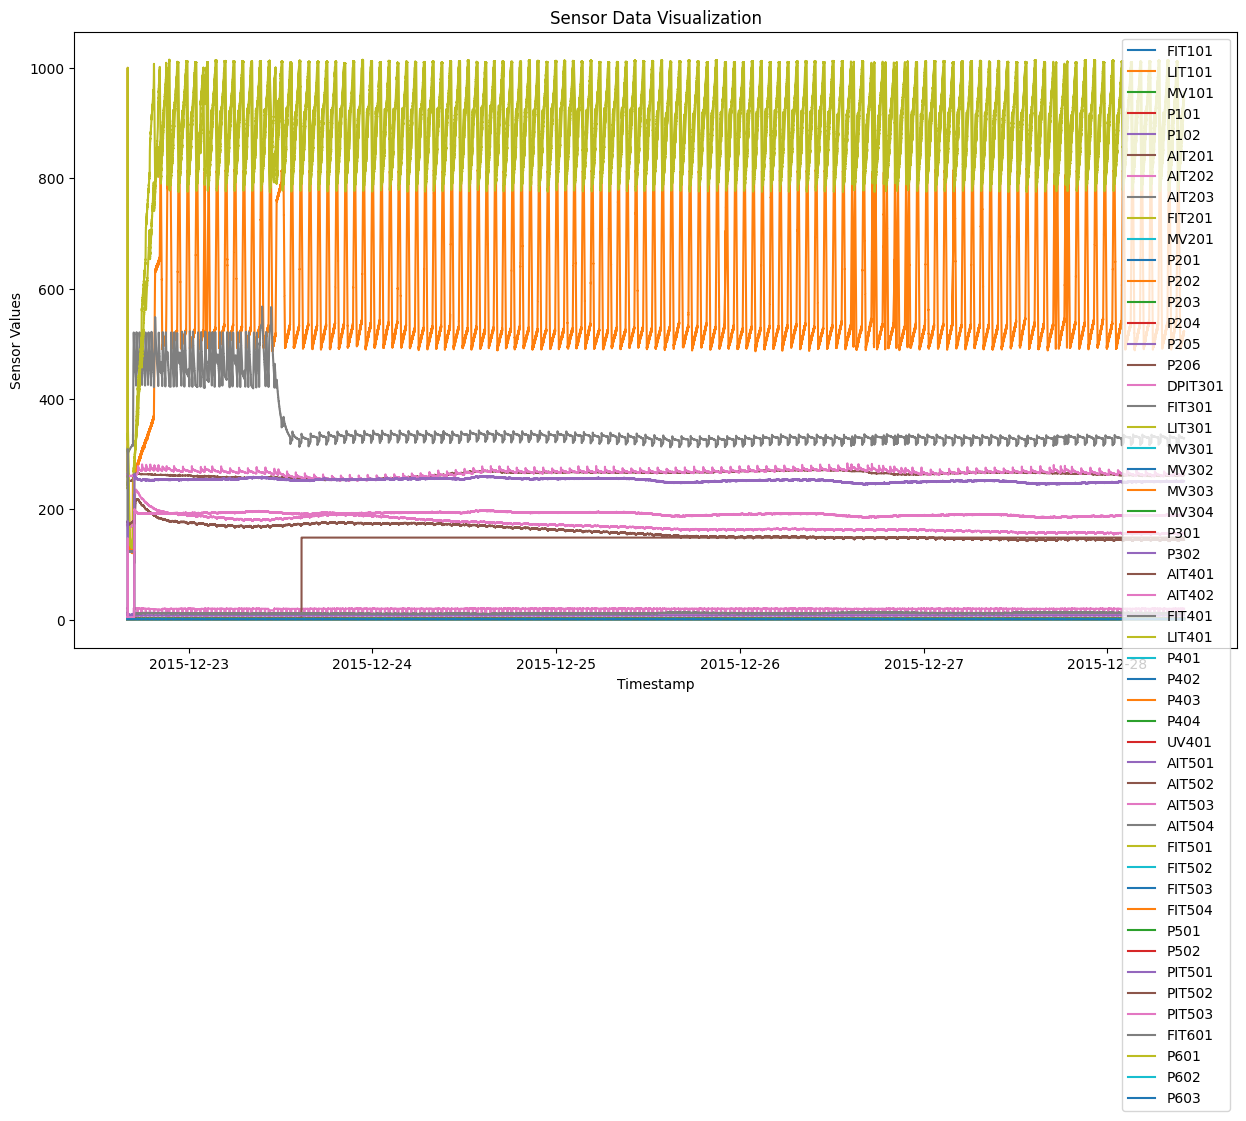

In [73]:
def visualize_sensor_data(df, window=None, sensors=None):
    # If window is None, visualize the entire dataset
    if window is None:
        start_index, end_index = 0, len(df)
    else:
        start_index, end_index = window

    # If sensors is None, select all sensor columns
    if sensors is None:
        sensors = df.columns[1:-1]

    # Plot each sensor in a different color
    plt.figure(figsize=(15, 8))
    for sensor in sensors:
        plt.plot(df['Timestamp'][start_index:end_index], df[sensor][start_index:end_index], label=sensor)

    plt.xlabel('Timestamp')
    plt.ylabel('Sensor Values')
    plt.title('Sensor Data Visualization')
    plt.legend()

    plt.show()

visualize_sensor_data(train_data, window=None, sensors=['FIT101'])
visualize_sensor_data(train_data, window=None, sensors=['LIT101'])
visualize_sensor_data(train_data, window=None, sensors=["UV401"])
visualize_sensor_data(train_data, window=None, sensors=["P402"])
visualize_sensor_data(train_data, window=None, sensors=["P201"])
visualize_sensor_data(train_data)

### 2. PCA-based anomaly detection

In [74]:
sensor_cols = [c for c in sensor_cols if c in test_data.columns] #ensure same sensors in train and test

X_train = train_data[sensor_cols].values
X_test = test_data[sensor_cols].values

def fit_pca(X_train):
    mean_train = X_train.mean(axis=0)
    X_centered = X_train - mean_train


    cov_matrix = np.cov(X_centered, rowvar=False)

    eigenvalues, eigenvectors_all = np.linalg.eigh(cov_matrix)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors_all = eigenvectors_all[:, idx]

    return mean_train, eigenvalues, eigenvectors_all

mean_train, eigvals, eigvecs = fit_pca(X_train)

n_features = X_train.shape[1]
print("Number of sensors (features):", n_features)

Number of sensors (features): 44


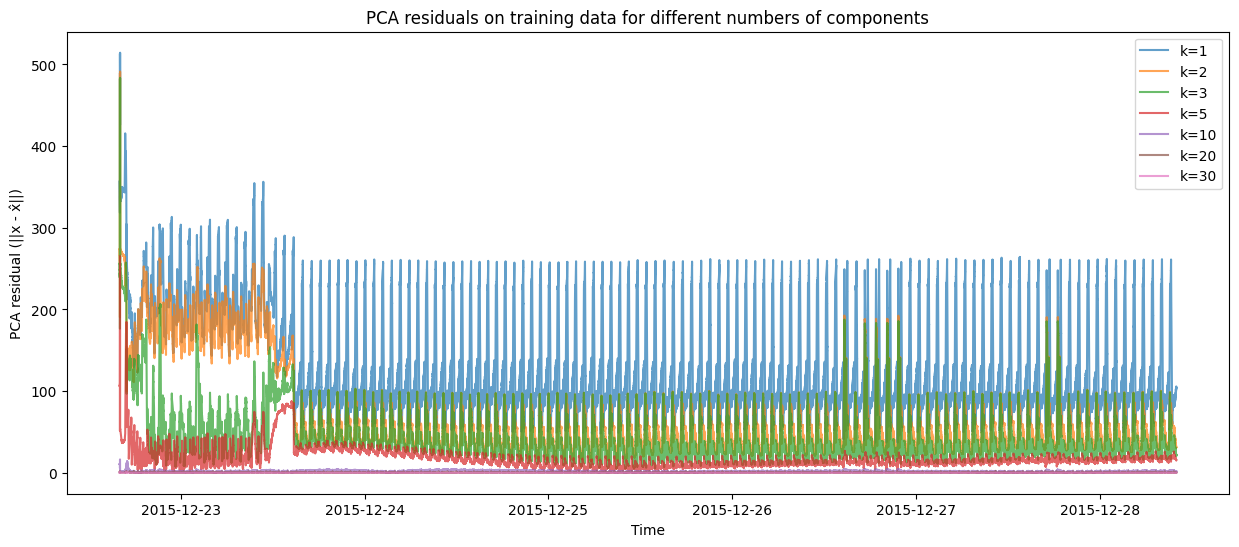

In [75]:
def pca_residuals(X, mean_train, eigvecs, k):
    X_centered = X - mean_train
    Wk = eigvecs[:, :k]

    Z = X_centered @ Wk

    X_recon_centered = Z @ Wk.T 
    X_recon = X_recon_centered + mean_train

    residual = np.linalg.norm(X - X_recon, axis=1)

    return residual

ks = [1, 2, 3, 5, 10, 20, 30]

train_residuals = {}
for k in ks:
    train_residuals[k] = pca_residuals(X_train, mean_train, eigvecs, k)

time_train = train_data["Timestamp"]

plt.figure(figsize=(15, 6))
for k in ks:
    plt.plot(time_train, train_residuals[k], label=f"k={k}", alpha=0.7)

plt.xlabel("Time")
plt.ylabel("PCA residual (||x - x̂||)")
plt.title("PCA residuals on training data for different numbers of components")
plt.legend()
plt.show()

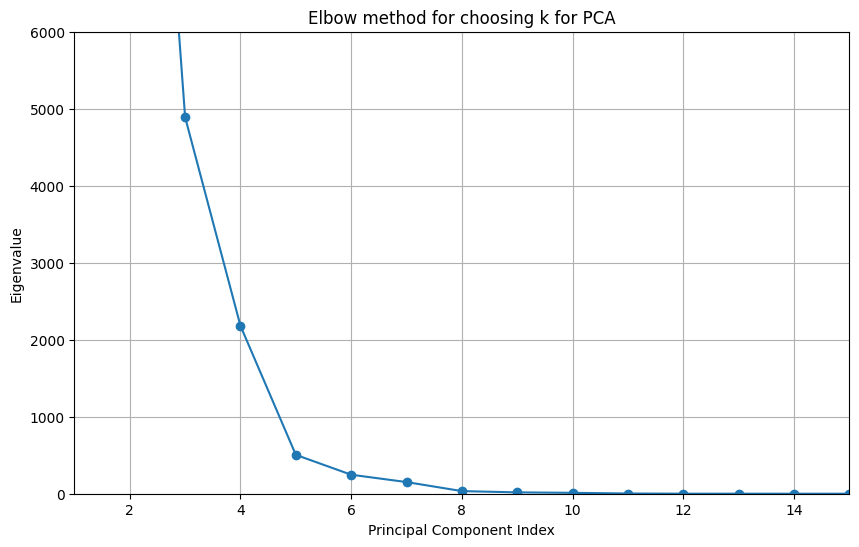

In [76]:
X = train_data[sensor_cols].values
X_centered = X - X.mean(axis=0)
cov = np.cov(X_centered, rowvar=False)
eigvals, eigvecs = np.linalg.eig(cov)
eigvals_sorted = np.sort(eigvals)[::-1]

explained_var = eigvals_sorted / eigvals_sorted.sum()
cum_explained_var = np.cumsum(explained_var)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigvals_sorted) + 1), eigvals_sorted, 'o-', label='Eigenvalues')
plt.ylim(0, 6000)
plt.xlim(1, 15) 
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue")
plt.title("Elbow method for choosing k for PCA")
plt.grid(True)
plt.show()

Based on the plot with mulitple values of k and on the one with the elbow method, we choose k = 5.

In [77]:
k_star = 5 


We choose a threshold based on the 99.5th percentile of the training data and then plot the anomalies on the training data.

In [78]:
train_res_k = train_residuals[k_star]

threshold = np.percentile(train_res_k, 99.5)

train_anomalies = np.where(train_res_k > threshold)[0]
time_train = train_data["Timestamp"]
anom_mask_train = train_res_k > threshold #mask for values above threshold

print("Number of anomalies in train data:", anom_mask_train.sum())
print("Threshold: ", threshold)

Number of anomalies in train data: 2484
Threshold:  82.83410424195921


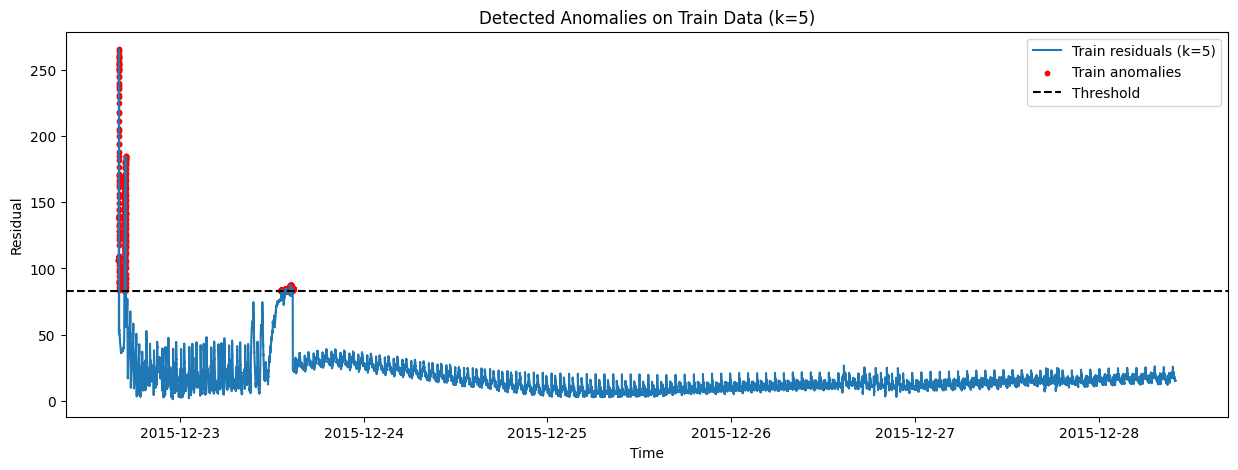

In [79]:
plt.figure(figsize=(15,5))
plt.plot(time_train, train_res_k, label=f"Train residuals (k={k_star})")
plt.scatter(time_train[train_anomalies], train_res_k[train_anomalies],
            color="red", s=10, label="Train anomalies")
plt.axhline(threshold, color="black", linestyle="--", label="Threshold")
plt.title(f"Detected Anomalies on Train Data (k={k_star})")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.legend()
plt.show()


Now we plot anomalies for test data.

In [80]:
test_res_k = pca_residuals(X_test, mean_train, eigvecs, k_star)
test_anomalies  = np.where(test_res_k > threshold)[0]
time_test = test_data["Timestamp"]
anom_mask_test = test_res_k > threshold

print("Number of anomalies in test:", anom_mask_test.sum())

Number of anomalies in test: 33809


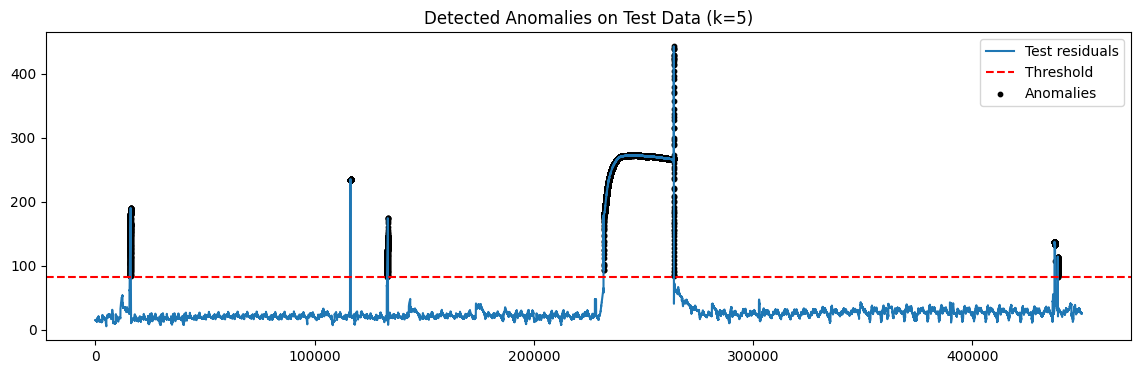

In [81]:
plt.figure(figsize=(14,4))
plt.plot(test_res_k, label="Test residuals")
plt.axhline(threshold, color="red", linestyle="--", label="Threshold")
plt.scatter(test_anomalies, test_res_k[test_anomalies], color="black", s=10, label="Anomalies")
plt.title(f"Detected Anomalies on Test Data (k={k_star})")
plt.legend()
plt.show()

#### Analysis of PCA residuals for different numbers of components

- We computed PCA residuals on the training data for several values of k and plotted them. For very small k, the residuals are large for all points because the PCA model is too simple to describe normal variation. As k increases, the residuals become more stable. However, large spikes remain visible at the beginning of the training period and at a few later timestamps. We think the starting high errors might be attributed to some start up erros when the sensors are started.

- We chose k = 5 as a compromise: the residuals for normal points are low, minimizing false alarms, while abnormal points still generate some peaks. This value provides a PCA model that captures the  correlation structure of the system without doing overfitting. The elbow method confirms our choice of k.

- Then to detect the peaks we we made use of quantiles and everything that is not in the 99.5th percentile is considered to be abnormal. 

### 3. DTW-based anomaly detection


In [82]:
def dynamic_time_warping(a, b):
    n = a.size
    m = b.size

    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0.0

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = (a[i-1] - b[j-1])**2

            dtw[i, j] = cost + min(
                dtw[i - 1, j],      
                dtw[i, j - 1],      
                dtw[i - 1, j - 1]   
            )

    return np.sqrt(dtw[n, m])


We chose "FIT101" because it has an interesting, cyclic behaviour.

In [83]:
signal_name = "FIT101"
train_sig = train_data[signal_name].values
test_sig  = test_data[signal_name].values

In [84]:
def sliding_windows(signal, window_size, stride):
    windows = []
    indices = []

    for start in range(0, len(signal) - window_size + 1, stride):
        end = start + window_size
        windows.append(signal[start:end])
        indices.append((start, end))

    return np.array(windows), indices

window_size = 100
stride = 300
train_windows, train_idx = sliding_windows(train_sig, window_size, stride)
test_windows, test_idx = sliding_windows(test_sig, window_size, stride)

rep_step = 200
representatives = train_windows[::rep_step]


In [85]:
def dtw_distance_to_representatives(windows, reps):
    distances = []
    for w in windows:
        # compute DTW from w to all representatives
        d = [dynamic_time_warping(w, r) for r in reps]
        distances.append(min(d))
    return np.array(distances)

print(len(train_windows), len(test_windows), len(representatives))


1656 1500 9


In [86]:
train_dtw_dist = dtw_distance_to_representatives(train_windows, representatives)
train_times = [train_data["Timestamp"].iloc[(s+e)//2] for s, e in train_idx]

test_dtw_dist  = dtw_distance_to_representatives(test_windows,  representatives)
test_times  = [test_data["Timestamp"].iloc[(s+e)//2]  for s, e in test_idx]

thr_dtw = np.percentile(train_dtw_dist, 99.0)
print("DTW threshold:", thr_dtw)

train_anom_dtw = np.where(train_dtw_dist > thr_dtw)[0]
test_anom_dtw  = np.where(test_dtw_dist  > thr_dtw)[0]

print("Number of train anomalies:", len(train_anom_dtw))
print("Number of test anomalies:", len(test_anom_dtw))

DTW threshold: 15.63564240826343
Number of train anomalies: 17
Number of test anomalies: 16


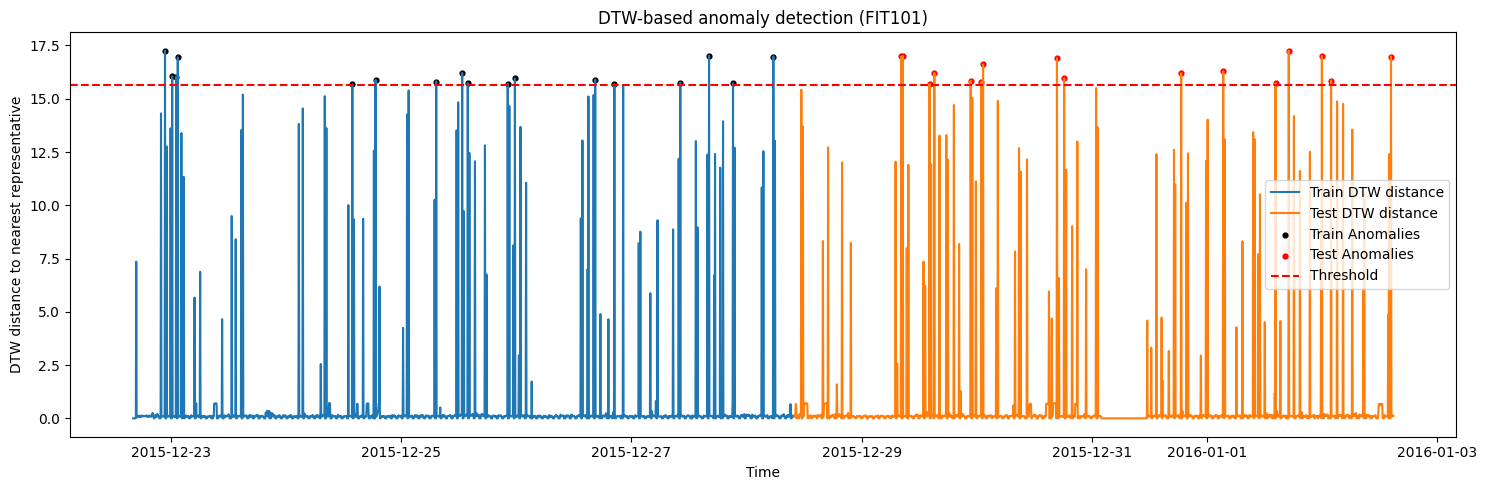

In [87]:
plt.figure(figsize=(15, 5))
plt.plot(train_times, train_dtw_dist, label="Train DTW distance")
plt.plot(test_times,  test_dtw_dist,  label="Test DTW distance")

plt.scatter(np.array(train_times)[train_anom_dtw],
            np.array(train_dtw_dist)[train_anom_dtw],
            color='black', s=12, label="Train Anomalies")

plt.scatter(np.array(test_times)[test_anom_dtw],
            np.array(test_dtw_dist)[test_anom_dtw],
            color='red', s=12, label="Test Anomalies")

plt.axhline(y=thr_dtw, color='red', linestyle='--', label='Threshold')

plt.xlabel("Time")
plt.ylabel("DTW distance to nearest representative")
plt.title(f"DTW-based anomaly detection ({signal_name})")
plt.legend()
plt.tight_layout()
plt.show()

#### DTW distance plot interpretation

DTW is computationally expensive. To reduce runtime we used:
- sliding windows with stride=300,
- representatives sampled every 200 windows,
- short window size (100).
These design choices keep the DTW stage fast enough to run in around 2min, but still display meaningful results.

The plot shows the DTW distance between each sliding window of the signal and its closest representative normal window. Regular operation produces a consistent sequence of window shapes, so the DTW distances remain relatively low and form a repeating pattern. In contrast, unusually high DTW distances indicate that the temporal shape of the signal in that window differs significantly from the normal pattern.

In the training/test data, several large spikes are visible. These correspond to abnormal temporal behavior, such as changes in cycle duration, unexpected spikes or drops, disturbances in the rising or falling parts of the cycle, or potential sensor faults. DTW therefore detects temporal anomalies(deviations in the shape of the signal), which PCA cannot detect because PCA ignores time structure.